In [1]:
import numpy as np
import matplotlib
from matplotlib.ticker import MaxNLocator, FixedLocator, LinearLocator
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Ellipse
import matplotlib.cm as cm
from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.offsetbox import AnchoredText

font0 = FontProperties()
font = font0.copy()
font.set_size(24)
font.set_family('serif')
labelfont=font0.copy()
labelfont.set_size(20)
labelfont.set_weight('bold')

legendfont=font0.copy()
legendfont.set_size(16)
legendfont.set_weight('bold')

plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}'
rc('text', usetex=True)
rc('font',**{'family':'serif', 'serif': ['Computer Modern Roman']})

In [2]:
redcol='#e41a1c'
bluecol='#1f78b5'
grncol='#33a12c'
purcol='#613d9b'
pinkcol='#fc9b9a'
orcol='#ff7f00'

In [3]:
def flushalign(ax):
    ic = 0
    for l in ax.get_yticklabels():
        if ic == 0:
            l.set_va("bottom")
        elif ic == len(ax.get_yticklabels())-1:
            l.set_va("top")
        ic += 1

    ic = 0
    for l in ax.get_xticklabels():
        if ic == 0:
            l.set_ha("left")
        elif ic == len(ax.get_xticklabels())-1:
            l.set_ha("right")
        ic += 1

In [47]:
MuBAppDisT0 = np.load("./FullAnalysis_AppDis_SSq2EE_SSq2MM.npy", allow_pickle=True)
PVs = np.load("./Dm41_SSq2EE_SSq2MM_PVs.npy", allow_pickle=True)
dm41VecT = PVs[0]
EVec = PVs[1]
MVec = PVs[2]

MuBAppDisT = (np.asarray(MuBAppDisT0.T[0])).reshape(len(dm41VecT), len(EVec), len(MVec))
MuBAppDisTAs = (np.asarray(MuBAppDisT0.T[1])).reshape(len(dm41VecT), len(EVec), len(MVec))

In [48]:
MargM = [[np.min([MuBAppDisT[dm41II][Ue4SqII][Um4SqII] for Um4SqII in range(len(MVec))]) for Ue4SqII in range(len(EVec))] for dm41II in range(len(dm41VecT))]
MargE = [[np.min([MuBAppDisT[dm41II][Ue4SqII][Um4SqII] for Ue4SqII in range(len(EVec))]) for Um4SqII in range(len(MVec))] for dm41II in range(len(dm41VecT))]

def FixUm4T(MII):
    return [[MuBAppDisT[dm41II][EII][MII] for EII in range(len(EVec))] for dm41II in range(len(dm41VecT))]
def FixUe4T(EII):
    return [[MuBAppDisT[dm41II][EII][MII] for MII in range(len(MVec))] for dm41II in range(len(dm41VecT))]

In [49]:
MargMAs = [[np.min([MuBAppDisTAs[dm41II][Ue4SqII][Um4SqII] for Um4SqII in range(len(MVec))]) for Ue4SqII in range(len(EVec))] for dm41II in range(len(dm41VecT))]
MargEAs = [[np.min([MuBAppDisTAs[dm41II][Ue4SqII][Um4SqII] for Ue4SqII in range(len(EVec))]) for Um4SqII in range(len(MVec))] for dm41II in range(len(dm41VecT))]

def FixUm4TAs(MII):
    return [[MuBAppDisTAs[dm41II][EII][MII] for EII in range(len(EVec))] for dm41II in range(len(dm41VecT))]
def FixUe4TAs(EII):
    return [[MuBAppDisTAs[dm41II][EII][MII] for MII in range(len(MVec))] for dm41II in range(len(dm41VecT))]

In [50]:
MINOS = np.loadtxt("MINOSPlus_90CL.csv", delimiter=",")
MINOSX = [4.0*mi*(1.0 - mi) for mi in np.transpose(MINOS)[0]]

IceCube = np.loadtxt("IceCube_99CL.csv", delimiter=",")
IceCube90 = np.loadtxt("IceCube_90CL.csv", delimiter=",")

Ga2S0 = np.loadtxt("Gallium_2sigma_l0.csv", delimiter=",")
Ga2S1 = np.loadtxt("Gallium_2sigma_l1.csv", delimiter=",")

RX0 = np.loadtxt("./Reactor_Spectra_Total.dat")
RXX = 10**np.unique(RX0.T[0])
RXY = 10**np.unique(RX0.T[1])
RXZ = (RX0.T[2]).reshape(len(RXX), len(RXY))

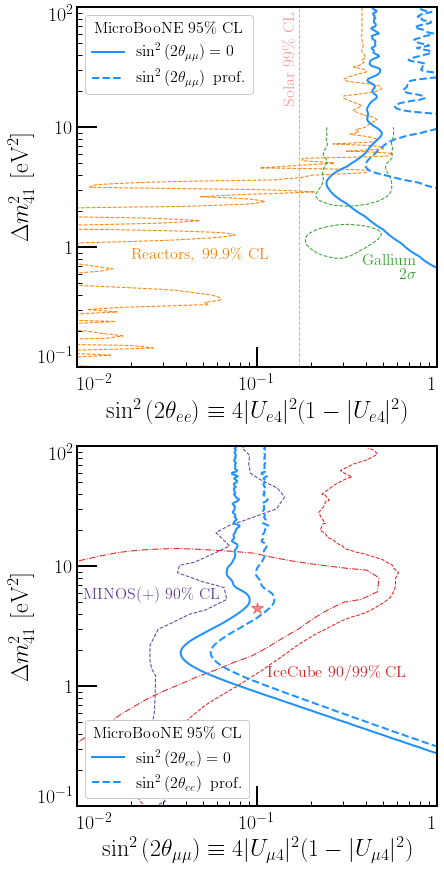

In [51]:
figwid = 5.0
fighei = 5.0
lside = 1.5
rside = 0.5
wwspace = 0.2

ncol = 1
nrow = 2

wid = lside + ncol*figwid + (ncol-1)*wwspace + rside

bot = 1.0
top = 0.5
hhspace = 1.1

hei = bot + nrow*fighei + (nrow-1)*hhspace + top

lfactor = lside/wid
rfactor = rside/wid
bfactor = bot/hei
tfactor = top/hei
wfactor = wwspace/figwid
hfactor = hhspace/fighei

matplotlib.rcParams['axes.linewidth'] = 2.0
fig, axes = plt.subplots(nrow, ncol, figsize=(wid, hei), facecolor='1.0');
fig.subplots_adjust(left = lfactor, bottom=bfactor, right=(1.0-rfactor), top=(1.0-tfactor), wspace=wfactor, hspace=hfactor);

xmin, xmax, ymin, ymax = 1e-2, 1, 1e-1, 1e2
ax = axes[0]
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=2, zorder=30)
ax.set_xlabel(r"$\sin^2\left(2\theta_{ee}\right)\equiv 4|U_{e 4}|^2 (1 - |U_{e 4}|^2)$", fontproperties=font)        
ax.set_ylabel(r'$\Delta m_{41}^2\ [\mathrm{eV}^2]$', fontproperties=font)        

ax.xaxis.set_major_locator(FixedLocator((1e-2, 1e-1, 1)))
ax.yaxis.set_major_locator(FixedLocator((1e-1, 1, 10, 100)))
ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=5, width=1)
[l.set_size(labelfont.get_size()) for l in ax.get_xticklabels()]
[l.set_size(labelfont.get_size()) for l in ax.get_yticklabels()]
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
ax.set_yticklabels((r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"), fontproperties=labelfont)
ax.set_xticklabels((r"$10^{-2}$", r"$10^{-1}$", r"$1$"), fontproperties=labelfont)

levsT2 = [np.min(MargM)+5.99]
ax.contour(EVec, dm41VecT, MargM, levels=levsT2, colors=['dodgerblue'], linestyles=['--'], linewidths=[2], zorder=20)
ch2AltM = FixUm4T(0)
levsT2 = [np.min(ch2AltM) + 5.99]
ax.contour(EVec, dm41VecT, ch2AltM, levels=levsT2, colors=['dodgerblue'], linestyles=['-'], linewidths=[2], zorder=20)

ax.plot(Ga2S0.T[0], Ga2S0.T[1], lw=1, color=grncol, ls='--', zorder=0)
ax.plot(Ga2S1.T[0], Ga2S1.T[1], lw=1, color=grncol, ls='--', zorder=0)
ax.plot([0.1704, 0.1704], [ymin, ymax], lw=1, color=pinkcol, ls='--', zorder=0)
ax.contour(RXX, RXY, RXZ.T, levels=[np.min(RXZ) + 13.8], colors=orcol, linestyles=['--'], linewidths=1, zorder=0)

ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='dodgerblue', ls='-', label=r"$\sin^2\left(2\theta_{\mu\mu}\right) = 0$")
ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='dodgerblue', ls='--', label=r"$\sin^2\left(2\theta_{\mu\mu}\right)\ \mathrm{prof.}$")
ax.legend(loc=2, prop=legendfont, title=r"$\mathrm{MicroBooNE\ 95\%\ CL}$", title_fontsize = legendfont.get_size(), framealpha=1.0)

ax.annotate(r"$\mathrm{Gallium}$", xy=(0.3, 0.6), xytext=(46, 20), textcoords="offset points", ha="center", va="top", size=16, color=grncol)
ax.annotate(r"$2\sigma$", xy=(0.3, 0.6), xytext=(64, 6), textcoords="offset points", ha="center", va="top", size=16, color=grncol)
ax.annotate(r"$\mathrm{Solar\ 99\%\ CL}$", xy=(1.7e-1, 100), xytext=(-2, -100), textcoords="offset points", ha="right", va="bottom", size=16, color=pinkcol, rotation=90)
ax.annotate(r"$\mathrm{Reactors,\ 99.9\%\ CL}$", xy=(0.02, 1.0), xytext=(0, 0), textcoords="offset points", ha="left", va="top", size=16, color=orcol)
flushalign(ax)

xmin, xmax, ymin, ymax = 1e-2, 1, 1e-1, 1e2
ax = axes[1]
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=2, zorder=30)
ax.set_xlabel(r"$\sin^2\left(2\theta_{\mu\mu}\right) \equiv 4|U_{\mu 4}|^2 (1 - |U_{\mu 4}|^2)$", fontproperties=font)        
ax.set_ylabel(r'$\Delta m_{41}^2\ [\mathrm{eV}^2]$', fontproperties=font)        

ax.xaxis.set_major_locator(FixedLocator((1e-2, 1e-1, 1)))
ax.yaxis.set_major_locator(FixedLocator((1e-1, 1, 10, 100)))
ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=5, width=1)
[l.set_size(labelfont.get_size()) for l in ax.get_xticklabels()]
[l.set_size(labelfont.get_size()) for l in ax.get_yticklabels()]
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
ax.set_xticklabels((r"$10^{-2}$", r"$10^{-1}$", r"$1$"), fontproperties=labelfont)
ax.set_yticklabels((r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"), fontproperties=labelfont)

levsT = [np.min(MargE) + 5.99]
ax.contour(MVec, dm41VecT, MargE, levels=levsT, colors=['dodgerblue'], linestyles=['-'], linewidths=[2])
ch2AltE = FixUe4T(0)
levsT2 = [np.min(ch2AltE) + 5.99]
ax.contour(MVec, dm41VecT, ch2AltE, levels=levsT2, colors=['dodgerblue'], linestyles=['--'], linewidths=[2])

ax.plot(MINOSX, MINOS.T[1], color=purcol, lw=1, ls='--', zorder=0)
ax.plot(IceCube.T[0], IceCube.T[1], color=redcol, lw=1, ls='--', zorder=0)
ax.plot(IceCube90.T[0], IceCube90.T[1], color=redcol, lw=1, ls='-.', zorder=0)
ax.plot([0.1], [4.5], lw=0, markersize=12, marker='*', color=redcol, zorder=0, alpha=0.5)

ax.annotate(r"$\mathrm{MINOS({+})\ 90\%\ CL}$", xy=(0.08, 6), xytext=(-20, -10), textcoords="offset points", ha="right", va="bottom", size=16, color=purcol)
ax.annotate(r"$\mathrm{IceCube\ 90/99\%\ CL}$", xy=(0.1, 1), xytext=(10, 5), textcoords="offset points", ha="left", va="bottom", size=16, color=redcol)

ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='dodgerblue', ls='-', label=r"$\sin^2\left(2\theta_{ee}\right) = 0$")
ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='dodgerblue', ls='--', label=r"$\sin^2\left(2\theta_{ee}\right)\ \mathrm{prof.}$")
leg = ax.legend(loc=3, prop=legendfont, title=r"$\mathrm{MicroBooNE\ 95\%\ CL}$", title_fontsize = legendfont.get_size(), framealpha=1.0)
flushalign(ax)

In [52]:
fig.savefig("NuE_NuMu_Disappearance_Marg.pdf", bbox_inches='tight')

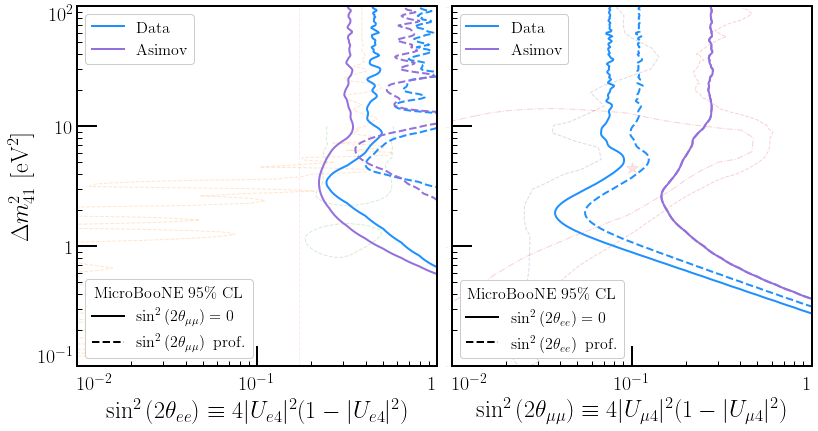

In [53]:
figwid = 5.0
fighei = 5.0
lside = 1.5
rside = 0.5
wwspace = 0.2

ncol = 2
nrow = 1

wid = lside + ncol*figwid + (ncol-1)*wwspace + rside

bot = 1.0
top = 0.5
hhspace = 1.1

hei = bot + nrow*fighei + (nrow-1)*hhspace + top

lfactor = lside/wid
rfactor = rside/wid
bfactor = bot/hei
tfactor = top/hei
wfactor = wwspace/figwid
hfactor = hhspace/fighei

matplotlib.rcParams['axes.linewidth'] = 2.0
fig, axes = plt.subplots(nrow, ncol, figsize=(wid, hei), facecolor='1.0');
fig.subplots_adjust(left = lfactor, bottom=bfactor, right=(1.0-rfactor), top=(1.0-tfactor), wspace=wfactor, hspace=hfactor);

xmin, xmax, ymin, ymax = 1e-2, 1, 1e-1, 1e2
ax = axes[0]
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=2, zorder=30)
ax.set_xlabel(r"$\sin^2\left(2\theta_{ee}\right)\equiv 4|U_{e 4}|^2 (1 - |U_{e 4}|^2)$", fontproperties=font)        
ax.set_ylabel(r'$\Delta m_{41}^2\ [\mathrm{eV}^2]$', fontproperties=font)        

ax.xaxis.set_major_locator(FixedLocator((1e-2, 1e-1, 1)))
ax.yaxis.set_major_locator(FixedLocator((1e-1, 1, 10, 100)))
ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=5, width=1)
[l.set_size(labelfont.get_size()) for l in ax.get_xticklabels()]
[l.set_size(labelfont.get_size()) for l in ax.get_yticklabels()]
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
ax.set_yticklabels((r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"), fontproperties=labelfont)
ax.set_xticklabels((r"$10^{-2}$", r"$10^{-1}$", r"$1$"), fontproperties=labelfont)

levsT2 = [np.min(MargM)+5.99]
ax.contour(EVec, dm41VecT, MargM, levels=levsT2, colors=['dodgerblue'], linestyles=['--'], linewidths=[2], zorder=20)
ch2AltM = FixUm4T(0)
levsT2 = [np.min(ch2AltM) + 5.99]
ax.contour(EVec, dm41VecT, ch2AltM, levels=levsT2, colors=['dodgerblue'], linestyles=['-'], linewidths=[2], zorder=20)
levsT2As = [np.min(MargMAs)+5.99]
ax.contour(EVec, dm41VecT, MargMAs, levels=levsT2As, colors=['mediumpurple'], linestyles=['--'], linewidths=[2], zorder=20)
ch2AltMAs = FixUm4TAs(0)
levsT2As = [np.min(ch2AltMAs) + 5.99]
ax.contour(EVec, dm41VecT, ch2AltMAs, levels=levsT2As, colors=['mediumpurple'], linestyles=['-'], linewidths=[2], zorder=20)

ax.plot(Ga2S0.T[0], Ga2S0.T[1], lw=1, color=grncol, ls='--', zorder=0, alpha=0.2)
ax.plot(Ga2S1.T[0], Ga2S1.T[1], lw=1, color=grncol, ls='--', zorder=0, alpha=0.2)
ax.plot([0.1704, 0.1704], [ymin, ymax], lw=1, color=pinkcol, ls='--', zorder=0, alpha=0.2)
ax.contour(RXX, RXY, RXZ.T, levels=[np.min(RXZ) + 13.8], colors=orcol, linestyles=['--'], linewidths=1, zorder=0, alpha=0.2)

h = []
h.append(plt.plot([], [], color='dodgerblue', ls='-', lw=2)[0])
h.append(plt.plot([], [], color='mediumpurple', ls='-', lw=2)[0])
leg2 = ax.legend(handles=h, labels=[r"$\mathrm{Data}$", r"$\mathrm{Asimov}$"], prop=legendfont, framealpha=1.0, loc=2)
ax.add_artist(leg2)

ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='k', ls='-', label=r"$\sin^2\left(2\theta_{\mu\mu}\right) = 0$")
ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='k', ls='--', label=r"$\sin^2\left(2\theta_{\mu\mu}\right)\ \mathrm{prof.}$")
ax.legend(loc=3, prop=legendfont, title=r"$\mathrm{MicroBooNE\ 95\%\ CL}$", title_fontsize = legendfont.get_size(), framealpha=1.0)
flushalign(ax)

xmin, xmax, ymin, ymax = 1e-2, 1, 1e-1, 1e2
ax = axes[1]
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=2, zorder=30)
ax.set_xlabel(r"$\sin^2\left(2\theta_{\mu\mu}\right) \equiv 4|U_{\mu 4}|^2 (1 - |U_{\mu 4}|^2)$", fontproperties=font)        
ax.set_ylabel(r'', fontproperties=font)        

ax.xaxis.set_major_locator(FixedLocator((1e-2, 1e-1, 1)))
ax.yaxis.set_major_locator(FixedLocator((1e-1, 1, 10, 100)))
ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=5, width=1)
[l.set_size(labelfont.get_size()) for l in ax.get_xticklabels()]
[l.set_size(0) for l in ax.get_yticklabels()]
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
ax.set_xticklabels((r"$10^{-2}$", r"$10^{-1}$", r"$1$"), fontproperties=labelfont)

levsT = [np.min(MargE) + 5.99]
ax.contour(MVec, dm41VecT, MargE, levels=levsT, colors=['dodgerblue'], linestyles=['-'], linewidths=[2])
ch2AltE = FixUe4T(0)
levsT2 = [np.min(ch2AltE) + 5.99]
ax.contour(MVec, dm41VecT, ch2AltE, levels=levsT2, colors=['dodgerblue'], linestyles=['--'], linewidths=[2])

levsTAs = [np.min(MargEAs) + 5.99]
ax.contour(MVec, dm41VecT, MargEAs, levels=levsTAs, colors=['mediumpurple'], linestyles=['-'], linewidths=[2])
ch2AltEAs = FixUe4TAs(0)
levsT2As = [np.min(ch2AltEAs) + 5.99]
ax.contour(MVec, dm41VecT, ch2AltEAs, levels=levsT2As, colors=['mediumpurple'], linestyles=['--'], linewidths=[2])

ax.plot(MINOSX, MINOS.T[1], color=purcol, lw=1, ls='--', zorder=0, alpha=0.2)
ax.plot(IceCube.T[0], IceCube.T[1], color=redcol, lw=1, ls='--', zorder=0, alpha=0.2)
ax.plot(IceCube90.T[0], IceCube90.T[1], color=redcol, lw=1, ls='-.', zorder=0, alpha=0.2)
ax.plot([0.1], [4.5], lw=0, markersize=12, marker='*', color=redcol, zorder=0, alpha=0.1)

h = []
h.append(plt.plot([], [], color='dodgerblue', ls='-', lw=2)[0])
h.append(plt.plot([], [], color='mediumpurple', ls='-', lw=2)[0])
leg2B = ax.legend(handles=h, labels=[r"$\mathrm{Data}$", r"$\mathrm{Asimov}$"], prop=legendfont, framealpha=1.0, loc=2)
ax.add_artist(leg2B)

ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='k', ls='-', label=r"$\sin^2\left(2\theta_{ee}\right) = 0$")
ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='k', ls='--', label=r"$\sin^2\left(2\theta_{ee}\right)\ \mathrm{prof.}$")
leg = ax.legend(loc=3, prop=legendfont, title=r"$\mathrm{MicroBooNE\ 95\%\ CL}$", title_fontsize = legendfont.get_size(), framealpha=1.0)
flushalign(ax)

In [54]:
fig.savefig("NuE_NuMu_Disappearance_Asimov.pdf", bbox_inches='tight')